In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'train.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
col_with_null = df.isnull().any()
col_with_null

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [10]:
null_cols = col_with_null[col_with_null].index.to_list()
null_cols

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
df[null_cols].select_dtypes(include='object').columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed'], dtype='object')

In [12]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace = True)

/tmp/ipykernel_7466/1571170048.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace = True)


In [13]:
# handling null value for numeric data
for col in ['LoanAmount','Loan_Amount_Term']:
    df[col].fillna(df[col].median(), inplace = True)

/tmp/ipykernel_7466/4163233493.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace = True)
/tmp/ipykernel_7466/4163233493.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [14]:
df.isnull().sum().sum()

np.int64(0)

In [15]:
df.drop('Loan_ID', axis=1, inplace = True)

## Distribution of Loan Status

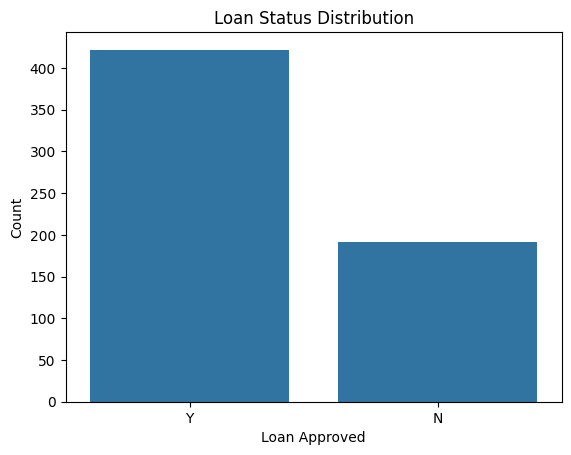

In [16]:
sns.countplot(data=df, x = 'Loan_Status')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Approved')
plt.ylabel('Count')
plt.show()

## Loan Status by Gender

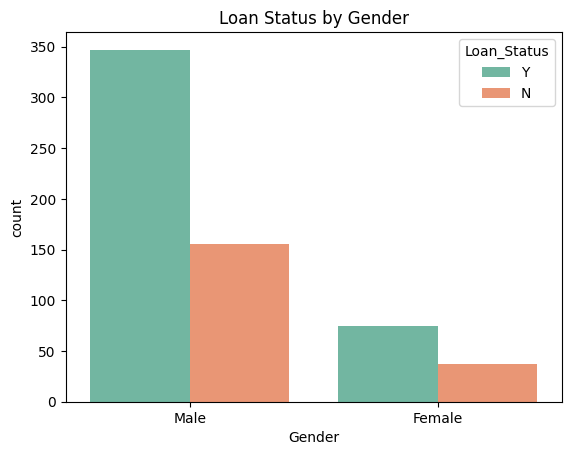

In [17]:
sns.countplot(data=df, x = 'Gender', hue='Loan_Status', palette='Set2')
plt.title('Loan Status by Gender')
plt.show()

## Loan Status by Education

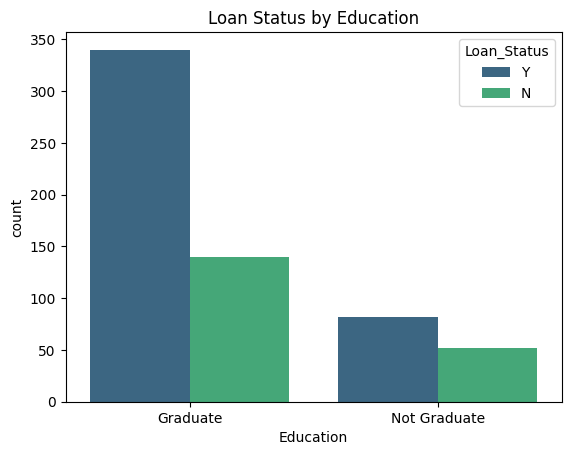

In [18]:
sns.countplot(data=df, x = 'Education', hue='Loan_Status', palette='viridis')
plt.title('Loan Status by Education')
plt.show()

## Loan Status by propertu Area

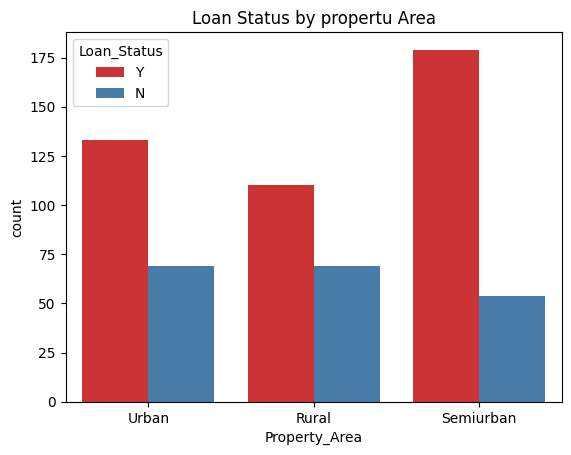

In [19]:
sns.countplot(data=df, x = 'Property_Area', hue='Loan_Status', palette='Set1')
plt.title('Loan Status by propertu Area')
plt.show()

## Applicant Income Distribution

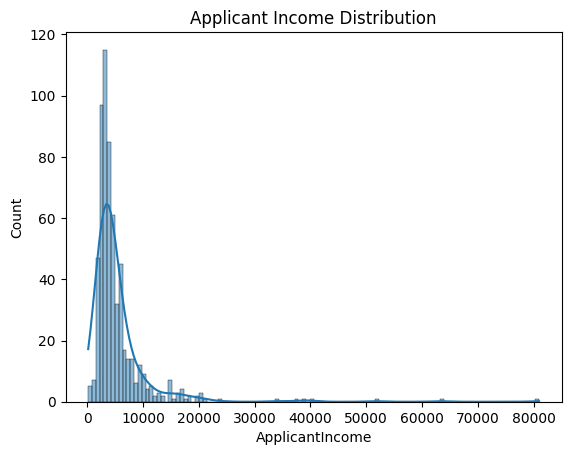

In [20]:
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Applicant Income Distribution')
plt.show()

## Loan Amount Distribution

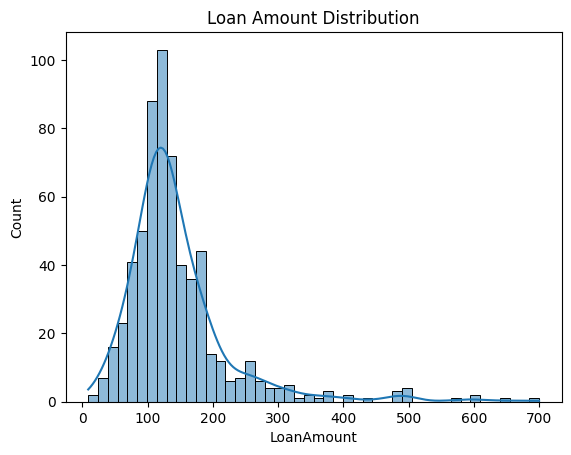

In [21]:
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()

## Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
le = LabelEncoder()

columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in columns:
    df[col] = le.fit_transform(df[col])

In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
ss = StandardScaler()

scaling_col = [['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
for col in scaling_col:
    df[col] = ss.fit_transform(df[col])

In [28]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


## Outlier Removal

In [30]:
def remove_outlier_iqr(df, col): 
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1 

    min_r = q1 - (1.5*iqr)
    max_r = q3 + (1.5*iqr) 
    return df[(df[col] <= max_r) & (df[col] >= min_r)]

In [31]:
df.shape

(614, 12)

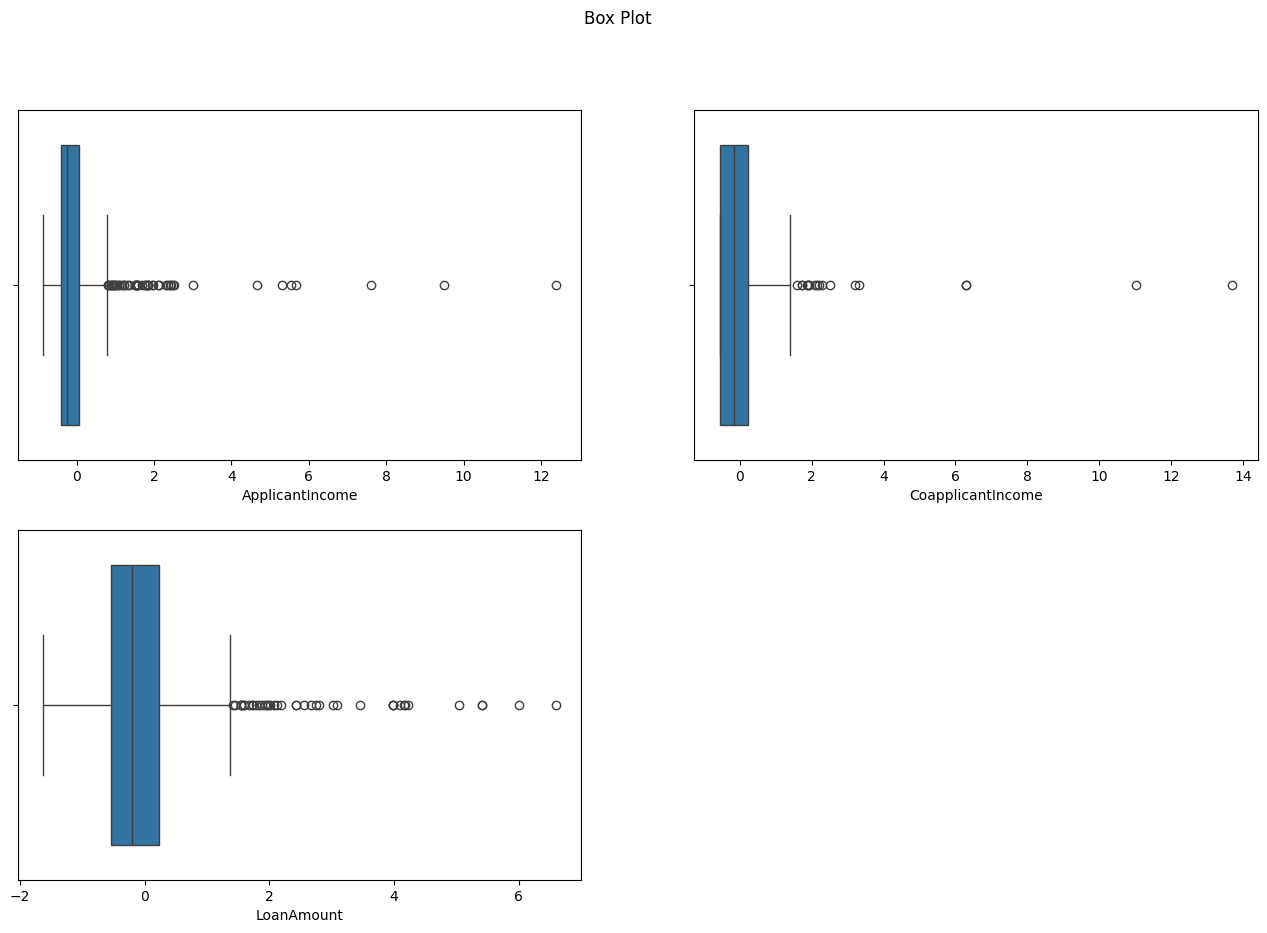

In [32]:
plt.figure(figsize=(16, 10))
plt.suptitle('Box Plot')
plt.subplot(2, 2, 1)
sns.boxplot(x=df['ApplicantIncome'])

plt.subplot(2, 2, 2)
sns.boxplot(x=df['CoapplicantIncome'])

plt.subplot(2, 2, 3)
sns.boxplot(x=df['LoanAmount'])
plt.show()

In [33]:
outlier_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [34]:
for col in outlier_col:
    df = remove_outlier_iqr(df, col)

In [35]:
df.shape

(520, 12)

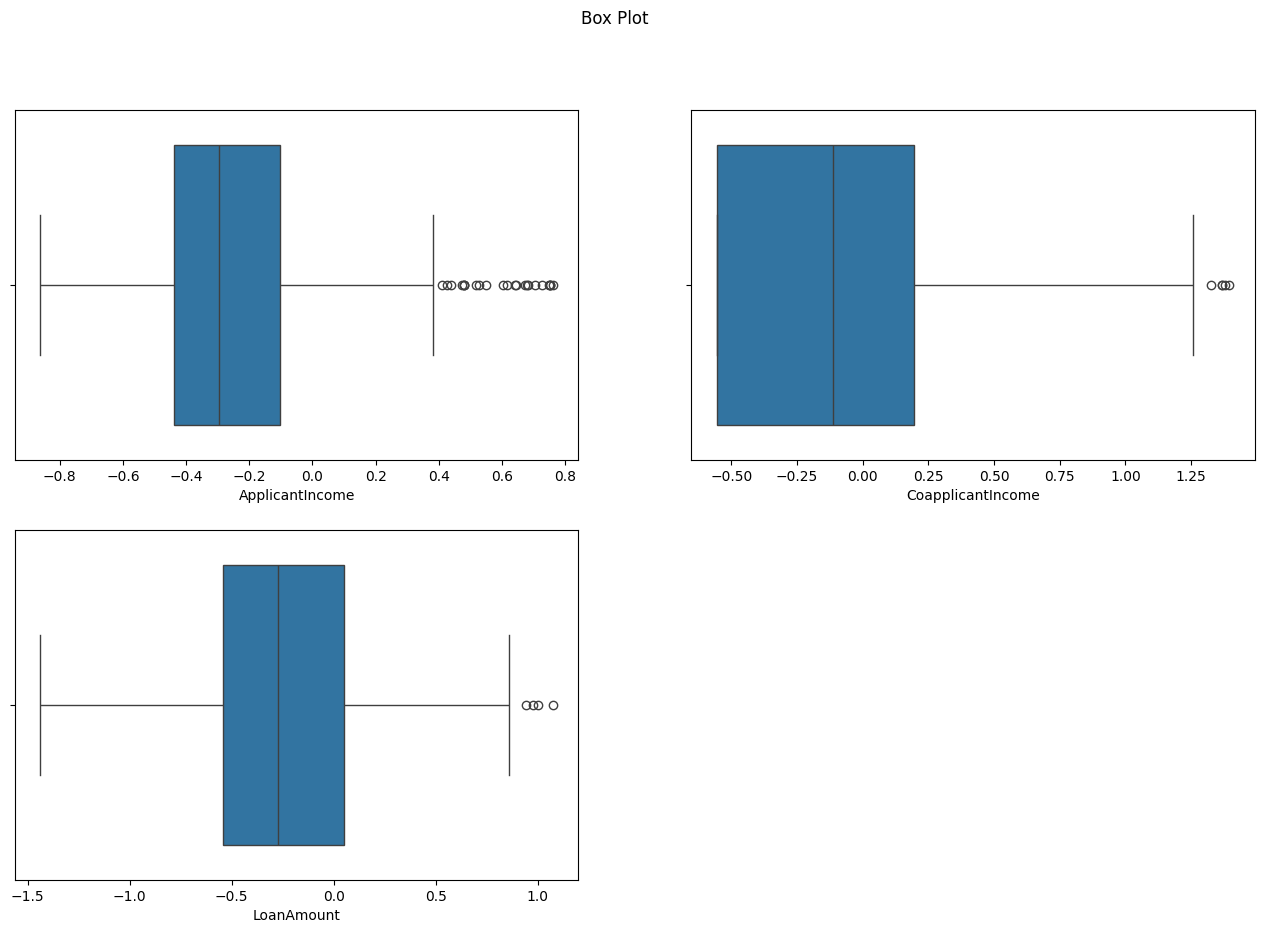

In [36]:
plt.figure(figsize=(16, 10))
plt.suptitle('Box Plot')
plt.subplot(2, 2, 1)
sns.boxplot(x=df['ApplicantIncome'])

plt.subplot(2, 2, 2)
sns.boxplot(x=df['CoapplicantIncome'])

plt.subplot(2, 2, 3)
sns.boxplot(x=df['LoanAmount'])
plt.show()

## Visualize with Heatmap

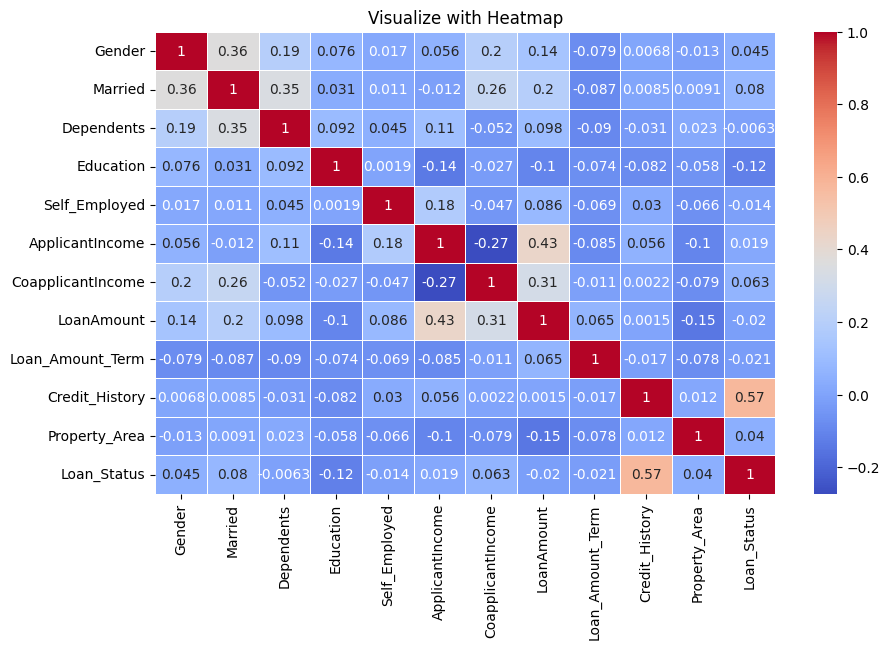

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Visualize with Heatmap')
plt.show()

## Feature Selection

In [38]:
target_corr = df.corr()['Loan_Status'].drop('Loan_Status')

In [39]:
target_corr.sort_values(ascending=False)

Credit_History       0.572195
Married              0.079509
CoapplicantIncome    0.062758
Gender               0.045152
Property_Area        0.040020
ApplicantIncome      0.019391
Dependents          -0.006297
Self_Employed       -0.014147
LoanAmount          -0.019795
Loan_Amount_Term    -0.020975
Education           -0.117472
Name: Loan_Status, dtype: float64

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [42]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x, y)

RandomForestClassifier(random_state=42)

In [43]:
importances = pd.DataFrame({
    "Features": x.columns,
    "Importances": rfc.feature_importances_
}).sort_values(by='Importances', ascending=False)

In [44]:
importances

,Features,Importances
9,Credit_History,0.290146
5,ApplicantIncome,0.205261
7,LoanAmount,0.171939
6,CoapplicantIncome,0.111766
8,Loan_Amount_Term,0.047556
10,Property_Area,0.046456
2,Dependents,0.043866
1,Married,0.024205
3,Education,0.022870
0,Gender,0.018845


# Training Model

In [45]:
selected_features = ['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome',
                     'Education', 'Married', 'Dependents', 'Property_Area', 'Loan_Amount_Term']


In [46]:
x = df[selected_features]
y = df['Loan_Status']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [50]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100

(82.6923076923077, 82.05128205128204)

In [51]:
accuracy_score(y_test, lr.predict(x_test))

0.8205128205128205

In [52]:
classification_report(y_test, lr.predict(x_test))

'              precision    recall  f1-score   support\n\n           0       0.89      0.49      0.63        49\n           1       0.81      0.97      0.88       107\n\n    accuracy                           0.82       156\n   macro avg       0.85      0.73      0.76       156\nweighted avg       0.83      0.82      0.80       156\n'

## Random Forest Classifier

In [53]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)*100, rf.score(x_test, y_test)*100

(100.0, 81.41025641025641)

In [54]:
accuracy_score(y_test, rf.predict(x_test))

0.8141025641025641

In [55]:
classification_report(y_test, rf.predict(x_test))

'              precision    recall  f1-score   support\n\n           0       0.81      0.53      0.64        49\n           1       0.81      0.94      0.87       107\n\n    accuracy                           0.81       156\n   macro avg       0.81      0.74      0.76       156\nweighted avg       0.81      0.81      0.80       156\n'

## Support Vector Machine

In [56]:
from sklearn.svm import SVC

In [57]:
sv = SVC(kernel='rbf', random_state=42)
sv.fit(x_train, y_train) 
sv.score(x_train, y_train)*100, sv.score(x_test, y_test)*100

(82.6923076923077, 82.05128205128204)

<h2 style='color:green;'>Hyperparameter Tuning with RandomizedSearchCV (for Random Forest)</h2>

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [60]:
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=20, 
    cv= 3, 
    verbose=2,
    random_state=42, 
    n_jobs=-1
)

In [61]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, verbose=2)

In [62]:
random_search.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 15,
 'bootstrap': True}

## Train Random Forest with Best parameter

In [63]:
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(x_test)

In [64]:
accuracy_score(y_test, y_pred_best_rf)

0.8205128205128205

In [65]:
classification_report(y_test, y_pred_best_rf)

'              precision    recall  f1-score   support\n\n           0       0.84      0.53      0.65        49\n           1       0.82      0.95      0.88       107\n\n    accuracy                           0.82       156\n   macro avg       0.83      0.74      0.76       156\nweighted avg       0.82      0.82      0.81       156\n'

<h1 style='color:purple;'>Save The Model</h1>

In [66]:
import joblib

In [67]:
joblib.dump(best_rf, "best_random_forest_model.joblib")

['best_random_forest_model.joblib']

# Predict on Test Dataset (test.csv)

In [68]:
test_df = pd.read_csv(r'test.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [69]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

/tmp/ipykernel_7466/2949690653.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(test_df[col].mode()[0], inplace=True)


In [70]:
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].median(), inplace=True)


/tmp/ipykernel_7466/3532637514.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)
/tmp/ipykernel_7466/3532637514.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [71]:
loan_ids = test_df['Loan_ID']
test_df.drop('Loan_ID', axis=1, inplace=True)

In [72]:
scaling_col = [['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
for col in scaling_col:
    test_df[col] = ss.fit_transform(test_df[col])

In [73]:
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']:
    test_df[col] = le.fit_transform(test_df[col])

In [74]:
scaling_col = [['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
for col in scaling_col:
    test_df[col] = ss.fit_transform(test_df[col])

In [75]:
x_test_final = test_df[selected_features]

In [76]:
x_test_final

,Credit_History,LoanAmount,ApplicantIncome,CoapplicantIncome,Education,Married,Dependents,Property_Area,Loan_Amount_Term
0,1.0,-0.426780,0.186461,-0.673335,0,1,0,2,0.266022
1,1.0,-0.163953,-0.352692,-0.029848,0,1,1,2,0.266022
2,1.0,1.183033,0.039641,0.098849,0,1,2,2,0.266022
3,1.0,-0.591047,-0.502774,0.418877,0,1,2,2,0.266022
4,1.0,-0.952433,-0.311909,-0.673335,1,0,0,2,0.266022
...,...,...,...,...,...,...,...,...,...
362,1.0,-0.377500,-0.162439,0.088982,1,1,3,2,0.266022
363,1.0,-0.344647,-0.132056,-0.369180,0,1,0,2,0.266022
364,1.0,-0.163953,-0.317211,0.181644,0,0,0,1,0.266022
365,1.0,0.361700,0.039641,0.353241,0,1,0,0,0.266022


In [77]:
test_pred = best_rf.predict(x_test_final)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [78]:
test_pred_labels = ['Y' if pred == 1 else 'N' for pred in test_pred]

In [79]:
submission = pd.DataFrame({
    'Loan_ID': loan_ids,
    'Loan_Status': test_pred_labels
})

In [80]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [81]:
submission['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [83]:
submission.to_csv("submission.csv", index=False)